In [9]:
# 🏁 1. Install and import dependencies (run once!)
# If using Colab or not installed:
# !pip install autogluon --upgrade

import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report




In [10]:
# 🏁 1. Install and import dependencies
# If you haven't already, uncomment below to install:
# !pip install autogluon

import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 📂 2. Load the data
train = pd.read_csv("../data/processed/train.csv")
val   = pd.read_csv("../data/processed/val.csv")
test  = pd.read_csv("../data/processed/test.csv")

print(train.shape, val.shape, test.shape)
train.head()

# 🏷️ 3. Setup: define target column
TARGET = "Target"   # adjust if your target column is named differently

# 🚀 4. Train with AutoGluon - exclude neural nets for speed/focus
predictor = TabularPredictor(label=TARGET, eval_metric='accuracy', path="models/autogluon/") \
    .fit(
        train_data=train,
        time_limit=600,  # 1 hour time budget; adjust as needed
        excluded_model_types=['NN','NN_TORCH','FASTAI'],  # Exclude neural nets, use tree-based models etc
        presets='best_quality',
        verbosity=2
    )

# 💡 AutoGluon will train e.g. LightGBM, CatBoost, XGBoost, RF, ExtraTrees, KNN, etc.

# 5️⃣ 5. Leaderboard: see model performances
lb = predictor.leaderboard(val, silent=True)
display(lb)

# 🧪 6. Predict and evaluate on test set
y_true = test[TARGET]
y_pred = predictor.predict(test)

print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average="weighted"))
print("Recall:   ", recall_score(y_true, y_pred, average="weighted"))
print("F1-score: ", f1_score(y_true, y_pred, average="weighted"))
print("\nClassification report:\n")
print(classification_report(y_true, y_pred))





Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: models/autogluon//ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.


(3963, 28) (1322, 28) (1322, 28)


Spend 159 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 441 seconds.
Starting full fit now with num_stack_levels 1.
Beginning AutoGluon training ... Time limit = 441s
AutoGluon will save models to "models/autogluon/"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112
CPU Count:          8
Memory Avail:       2.41 GB / 8.00 GB (30.1%)
Disk Space Avail:   4.43 GB / 228.27 GB (1.9%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    3963
Train Data Columns: 27
Label Column:       Target
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Av

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,0.942511,0.945748,accuracy,17.454526,30.047456,243.368704,0.106824,0.210244,10.835164,2,True,35
1,WeightedEnsemble_L3,0.942511,0.945748,accuracy,17.455582,30.047873,244.240985,0.001056,0.000417,0.872282,3,True,44
2,RandomForestEntr_BAG_L2,0.940998,0.939944,accuracy,17.381251,29.992496,233.667199,0.033549,0.155284,1.133659,2,True,37
3,ExtraTreesEntr_BAG_L2,0.940998,0.933888,accuracy,17.388845,29.954514,232.858092,0.041143,0.117302,0.324552,2,True,40
4,LightGBMLarge_BAG_L2,0.940998,0.943982,accuracy,17.733617,30.481700,259.093289,0.385915,0.644489,26.559750,2,True,42
5,RandomForestGini_BAG_L2,0.940242,0.939944,accuracy,17.385658,29.980800,233.750625,0.037956,0.143588,1.217086,2,True,36
6,ExtraTreesGini_BAG_L2,0.940242,0.932374,accuracy,17.391728,29.946676,232.895598,0.044026,0.109464,0.362058,2,True,39
7,XGBoost_BAG_L2,0.940242,0.945496,accuracy,17.536121,29.953360,243.403848,0.188419,0.116148,10.870309,2,True,41
8,LightGBMXT_BAG_L2,0.939486,0.942720,accuracy,17.405644,29.946536,238.869928,0.057942,0.109324,6.336388,2,True,34
9,CatBoost_r177_BAG_L2,0.938729,0.943477,accuracy,17.378552,29.880836,251.891334,0.030850,0.043625,19.357794,2,True,43


Accuracy:  0.9296520423600605
Precision: 0.9315665322085761
Recall:    0.9296520423600605
F1-score:  0.9293298579047978

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       291
           1       0.91      0.97      0.94       706
           2       0.98      0.87      0.92       325

    accuracy                           0.93      1322
   macro avg       0.94      0.91      0.92      1322
weighted avg       0.93      0.93      0.93      1322



Computing feature importance via permutation shuffling for 27 features using 1322 rows with 5 shuffle sets...
	2262.67s	= Expected runtime (452.53s per shuffle set)
	2152.04s	= Actual runtime (Completed 5 of 5 shuffle sets)


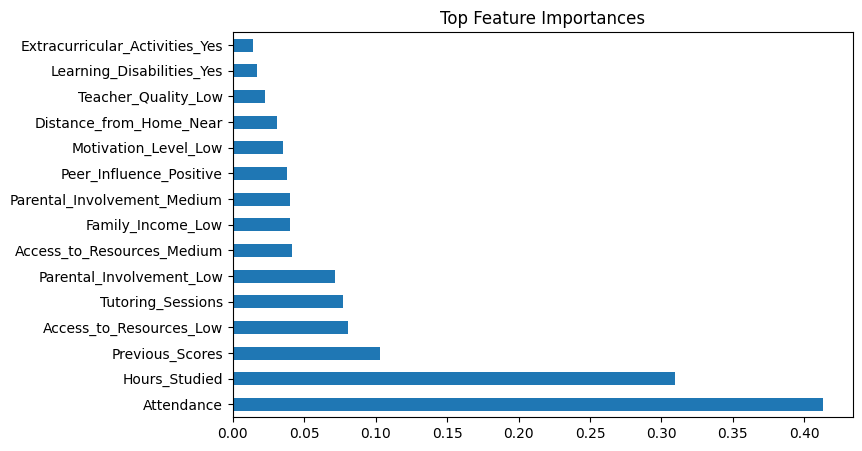

In [13]:
# 🔍 7. (Optional) Feature importance plot
import matplotlib.pyplot as plt
fi = predictor.feature_importance(test)
plt.figure(figsize=(8,5))
fi['importance'].head(15).plot(kind='barh')
plt.title('Top Feature Importances')
plt.show()